# Task1 - Predict the percentage of marks of an student based on the number of study hours

Prediction using supervised ML with the help of linear Regression

Name : Gargi Pawar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the CSV file

In [9]:

student_df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [10]:
student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
# Lets see few top rows with help of head()
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
student_df.dtypes

Hours     float64
Scores      int64
dtype: object

In [13]:
#with the help of shape method we can see number of rows and columns present in the csv file
student_df.shape

(25, 2)

In [14]:
# checking the null values
student_df.isna().sum()

Hours     0
Scores    0
dtype: int64

From above we can say there are no NAN values ..

In [15]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
#describe() is used to view some basic statistical details like percentile, mean, std etc.
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


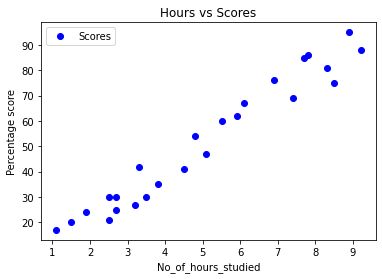

In [17]:
# Plotting the distribution of scores
student_df.plot(x = 'Hours' , y = 'Scores' , style = 'o' , c = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('No_of_hours_studied')
plt.ylabel('Percentage score')
plt.show()

We can say that from above graph that as number of hours increase then gradually percentage also increases

# Data preparation

In [18]:
x = student_df.drop(['Scores'],axis = 1)
y = student_df['Scores']

In [19]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state = 0)

In [22]:
x_train.shape

(12, 1)

In [23]:
x_test.shape

(13, 1)

# Training the model

from sklearn.linear_model import LinearRegression
regres = LinearRegression()
regres.fit(x_train , y_train)

# Plotting the Regression Line as well as scatter plot

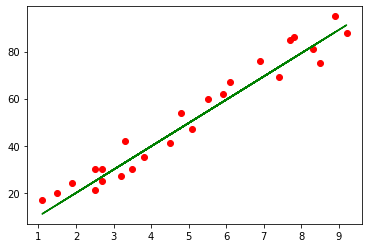

In [25]:
line = regres.coef_*x + regres.intercept_
plt.scatter(x,y,c='red')
plt.plot(x,line,c = 'green')
plt.show()

 # Making Predictions :

In [26]:
# Testing Data in hours
print(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3


In [29]:
# Predict the scores
y_pred = regres.predict(x_test)

In [28]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [30]:
student_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [31]:
student_df

,Actual,Predicted
5,20,14.973540
2,27,31.811747
19,69,73.412023
16,30,24.878368
11,62,58.554782
22,35,37.754644
17,24,18.935471
24,86,77.373954
23,76,68.459609
14,17,11.011609


In [33]:
hours = 9.25
our_prediction = regres.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted Score = {}".format(our_prediction))

Number of hours = 9.25
Predicted Score = [91.73595402]


# Evaluating the model

In [35]:
from sklearn import metrics
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error:  5.710484526967277
